# 1. 올해 사고가 가장 많았던 지역은?

### 1) - 경고 무시하기

In [1]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

### 2) - 시군구별 교통사고 데이터 불러오기

In [2]:
import pandas as pd

ta = pd.read_csv('./도로교통공단_시도 시군구별 교통사고(2019)/도로교통공단_시도 시군구별 교통사고(2019).csv')
ta.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1133,6,312,1075,172
1,서울,중구,1184,5,365,1083,167
2,서울,용산구,1187,10,316,1228,70
3,서울,성동구,1091,13,294,1063,82
4,서울,동대문구,1565,15,507,1340,141


In [3]:
ta['시도+시군구'] = ta['시도'] + " " + ta['시군구']
ta.set_index(['시도+시군구'], inplace=True)
ta.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도+시군구,,,,,,,
서울 종로구,서울,종로구,1133,6,312,1075,172
서울 중구,서울,중구,1184,5,365,1083,167
서울 용산구,서울,용산구,1187,10,316,1228,70
서울 성동구,서울,성동구,1091,13,294,1063,82
서울 동대문구,서울,동대문구,1565,15,507,1340,141


In [4]:
most_ta = ta.sort_values(by='사고건수', ascending=False)
most_ta_top10 = most_ta.head(10)
most_ta_top10

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도+시군구,,,,,,,
충북 청주시,충북,청주시,4949,49,1551,6097,290
경기 수원시,경기,수원시,4920,31,1172,5216,656
경기 안산시,경기,안산시,3965,27,1111,4505,326
경기 고양시,경기,고양시,3916,39,1096,4126,572
경기 성남시,경기,성남시,3801,39,1194,3955,596
서울 강남구,서울,강남구,3722,14,794,3924,464
대구 달서구,대구,달서구,3679,17,935,3992,454
경기 부천시,경기,부천시,3667,23,929,3837,342
경기 평택시,경기,평택시,3527,51,993,4046,691


### 3) - 사고가 가장 많은 지역 Top 10 시각화

#### matplotlib 한글 폰트 설정

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

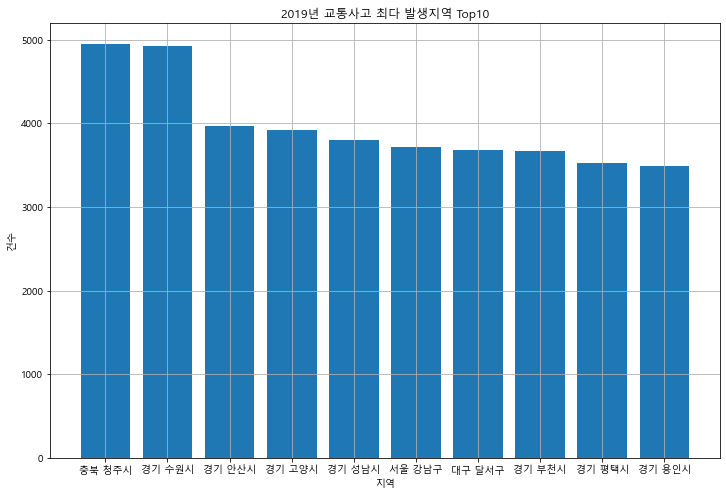

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.bar(most_ta_top10.index, most_ta_top10['사고건수'])
plt.grid()
plt.xlabel('지역')
plt.ylabel('건수')
plt.title('2019년 교통사고 최다 발생지역 Top10')
plt.show()

# 2. 음주는 사망사고에 영향을 미칠까?

### 1) - 시군구별 음주운전 교통사고 데이터 불러오기

In [7]:
ta_drink = pd.read_csv('./도로교통공단_부문별 교통사고(2019)/도로교통공단_음주운전 교통사고(2019).csv')
ta_drink.head(10)

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,48,0,10,63,5
1,서울,중구,30,0,10,29,3
2,서울,용산구,73,1,20,102,5
3,서울,성동구,61,0,20,69,3
4,서울,동대문구,63,0,29,53,4
5,서울,성북구,62,1,24,79,3
6,서울,도봉구,35,1,12,36,4
7,서울,은평구,77,0,27,83,16
8,서울,서대문구,35,0,9,41,9
9,서울,마포구,118,0,28,168,15


In [8]:
ta_drink['시도+시군구'] =  ta_drink['시도'] + " " + ta_drink['시군구']
ta_drink.set_index(['시도+시군구'], inplace=True)
ta_drink.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도+시군구,,,,,,,
서울 종로구,서울,종로구,48,0,10,63,5
서울 중구,서울,중구,30,0,10,29,3
서울 용산구,서울,용산구,73,1,20,102,5
서울 성동구,서울,성동구,61,0,20,69,3
서울 동대문구,서울,동대문구,63,0,29,53,4


### 2) - 음주사고 지역 Top10

In [9]:
most_ta_drink = ta_drink.sort_values(by='사고건수', ascending=False)
most_ta_drink.head(10)

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도+시군구,,,,,,,
경기 수원시,경기,수원시,376,1,104,497,31
충북 청주시,충북,청주시,356,5,108,494,20
충남 천안시,충남,천안시,350,4,75,498,18
경기 평택시,경기,평택시,335,15,99,429,48
경기 안산시,경기,안산시,308,2,105,401,20
서울 강남구,서울,강남구,293,1,75,420,28
경기 화성시,경기,화성시,272,3,71,397,22
경기 고양시,경기,고양시,268,3,83,356,33
경기 용인시,경기,용인시,264,9,74,317,54


### 3) - 전체교통사고 데이터 음주사고 데이터 조합

In [10]:
m1 = pd.merge(ta, ta_drink['사고건수'],
              on='시도+시군구')
m1['음주사고비율'] = (m1['사고건수_y'] / m1['사고건수_x']) * 100
m1.sort_values(by='음주사고비율', ascending=False).head()

,시도,시군구,사고건수_x,사망자수,중상자수,경상자수,부상신고자수,사고건수_y,음주사고비율
시도+시군구,,,,,,,,,
인천 옹진군,인천,옹진군,32,3,20,29,6,7,21.875000
경북 울릉군,경북,울릉군,18,0,19,30,13,3,16.666667
충남 서산시,충남,서산시,839,26,499,687,82,128,15.256257
충남 계룡시,충남,계룡시,55,1,29,64,5,8,14.545455
전북 완주군,전북,완주군,278,17,119,296,7,35,12.589928


In [11]:
m1.corr()

,사고건수_x,사망자수,중상자수,경상자수,부상신고자수,사고건수_y,음주사고비율
사고건수_x,1.000000,0.635544,0.954238,0.989015,0.854054,0.943430,-0.130595
사망자수,0.635544,1.000000,0.734387,0.635069,0.470466,0.705394,0.134988
중상자수,0.954238,0.734387,1.000000,0.925322,0.799593,0.912633,-0.090730
경상자수,0.989015,0.635069,0.925322,1.000000,0.817696,0.943989,-0.109464
부상신고자수,0.854054,0.470466,0.799593,0.817696,1.000000,0.785144,-0.163573
사고건수_y,0.943430,0.705394,0.912633,0.943989,0.785144,1.000000,0.089967
음주사고비율,-0.130595,0.134988,-0.090730,-0.109464,-0.163573,0.089967,1.000000


# 3. 월별로 교통사고가 가장 많은 지역은?

### 1) - 시군구별 월별 교통사고 데이터 불러오기

In [25]:
ta_month = pd.read_csv('./도로교통공단_시도 시군구별 교통사고(2019)/도로교통공단_시도 시군구별 월별 교통사고(2019).csv')
ta_month.head()

,시도,시군구,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,01월,87,1,25,88,12
1,서울,종로구,02월,66,1,22,50,12
2,서울,종로구,03월,87,2,25,79,18
3,서울,종로구,04월,85,0,25,91,15
4,서울,종로구,05월,112,1,25,115,18


### 2) - 인덱스 새로 만들기

In [31]:
ta_month['시도+시군구'] = ta_month['시도'] + " " + ta_month['시군구']
ta_month.head()

,시도,시군구,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,시도+시군구
0,서울,종로구,01월,87,1,25,88,12,서울 종로구
1,서울,종로구,02월,66,1,22,50,12,서울 종로구
2,서울,종로구,03월,87,2,25,79,18,서울 종로구
3,서울,종로구,04월,85,0,25,91,15,서울 종로구
4,서울,종로구,05월,112,1,25,115,18,서울 종로구


In [79]:
ta_month_temp = ta_month.groupby(by=['월', '시도+시군구']).sum()
ta_month_temp

사고건수  사망자수  중상자수  경상자수  부상신고자수
월   시도+시군구                                
01월 강원 강릉시    48     0    16    60       0
    강원 고성군    14     0     6    19       0
    강원 동해시    24     0     5    30       0
    강원 삼척시    41     4    13    48       0
    강원 속초시    32     1    11    41       0
...          ...   ...   ...   ...     ...
12월 충북 제천시    56     0    24    80       3
    충북 증평군    24     1     8    25       4
    충북 진천군    45     1     6    53       3
    충북 청주시   417    10   136   523      24
    충북 충주시   105     1    32   137       2

[2743 rows x 5 columns]

In [240]:
ta_month_temp[ta_month_temp.index.get_level_values('월') == '01월'] \
.sort_values(by='사고건수',ascending=False) \
.head(5)

사고건수  사망자수  중상자수  경상자수  부상신고자수
월   시도+시군구                                
01월 경기 수원시   369     2   102   354      26
    충북 청주시   347     1   100   433      23
    경기 안산시   326     4    88   378      21
    경기 성남시   295     5   113   264      47
    서울 강남구   281     2    67   305      40

### 3) - 사용자정의함수로 원하는 데이터 불러오기

In [251]:
def month_ta(month, n, kind='사고건수'):
    # 필요한 모듈 불러오기
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # 월별 최다 교통사고 지역 함수
    ta_month_temp = ta_month.groupby(by=['월', '시도+시군구']).sum()
    result = ta_month_temp[ta_month_temp.index.get_level_values('월') == "{0:02d}".format(month)+"월"] \
    .sort_values(by=kind, ascending=False) \
    .head(n)
    
    # 시각화
    fig = plt.figure(figsize=(6, 4))    
    plt.bar(result.index.get_level_values('시도+시군구'),
            result[kind])
    plt.title("{0:02d}".format(month)+"월"+" {}".format(kind)+" 최다 발생지역\n", fontsize=16)
    plt.xlabel("지역", fontsize=14)
    plt.xticks(rotation=90, )
    plt.ylabel("건수", fontsize=14)
    plt.show()
    
    return result

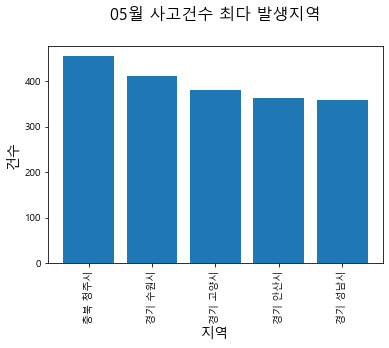

사고건수  사망자수  중상자수  경상자수  부상신고자수
월   시도+시군구                                
05월 충북 청주시   456     7   136   547      35
    경기 수원시   413     2   103   429      50
    경기 고양시   381     3   103   418      47
    경기 안산시   364     3   118   402      24
    경기 성남시   359     3   107   394      52

In [252]:
month_ta(5, 5, '사고건수')

### 4) - 모든 월 시각화

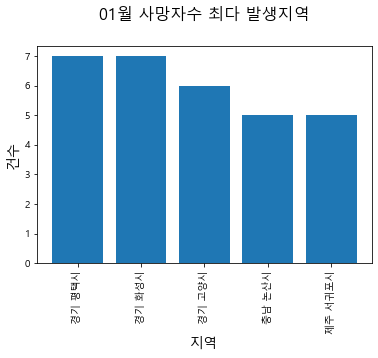

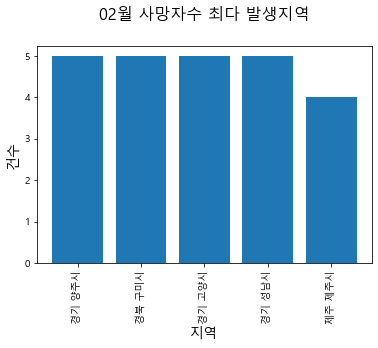

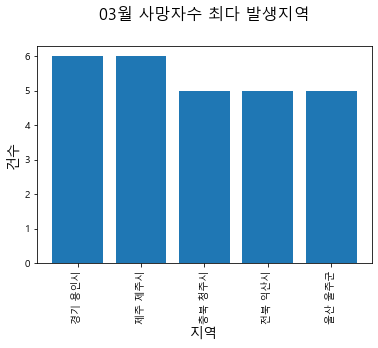

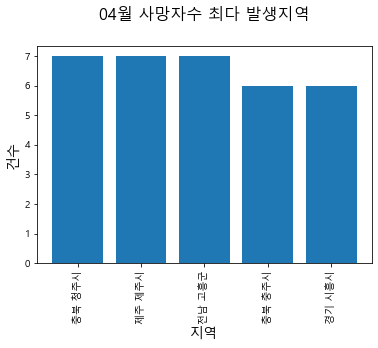

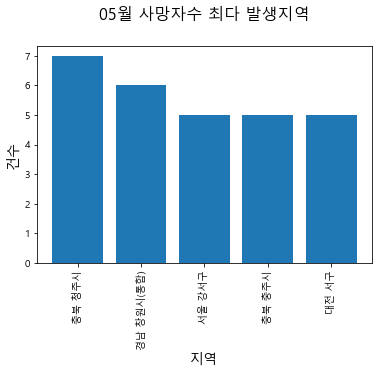

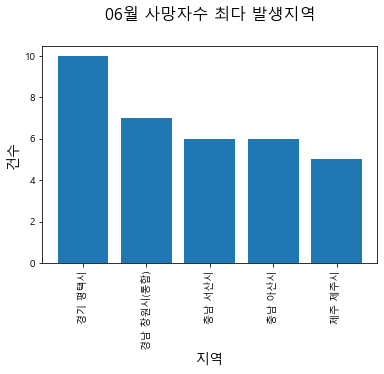

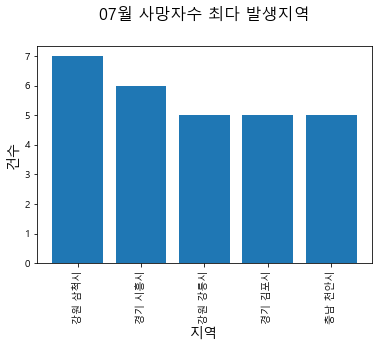

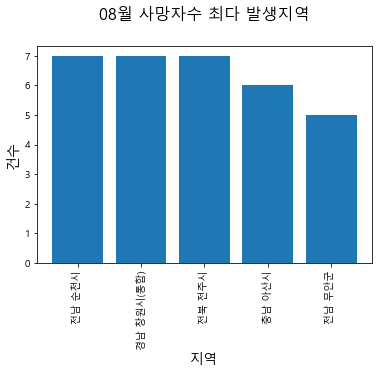

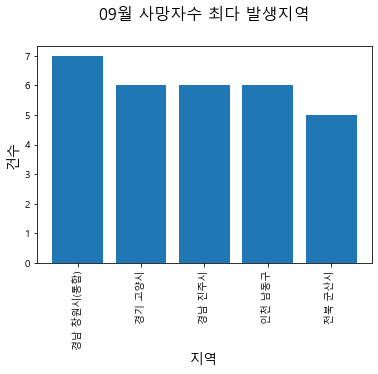

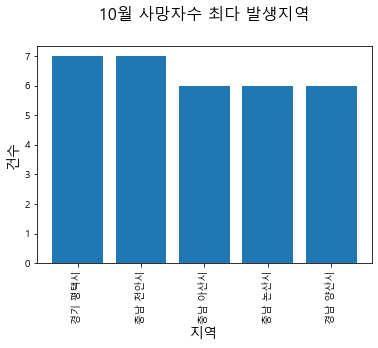

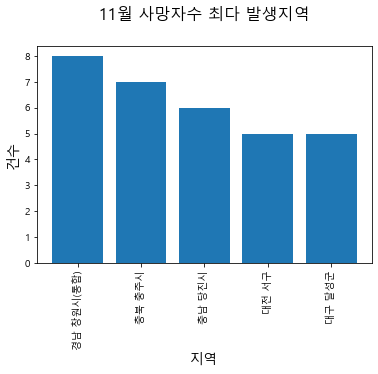

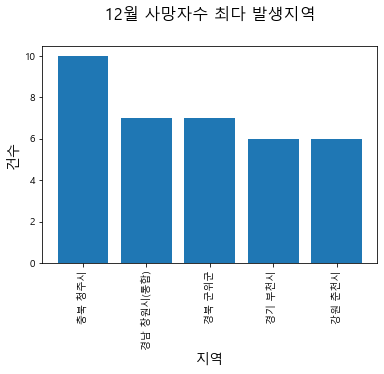

In [253]:
for i in range(12):
    month_ta(i+1, 5, '사망자수')

### 5) - 월별 교통사계 통계(교통사고와 월은 상관이 있을까?)

<AxesSubplot:xlabel='월', ylabel='사고건수'>

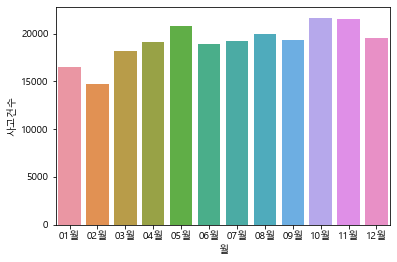

In [332]:
import seaborn as sns

sns.barplot(x=ta_month_new.index,
            y=ta_month_new['사고건수'])

In [347]:
ta_month_new = ta_month.groupby('월').sum()
ta_month_new

,사고건수,사망자수,중상자수,경상자수,부상신고자수
월,,,,,
01월,16552,296,5487,17249,1533
02월,14752,203,4772,16410,1430
03월,18133,252,5806,19390,1712
04월,19104,286,6224,20305,1909
05월,20779,305,6573,22332,2172
06월,18968,279,6057,20139,2119
07월,19234,241,5885,20392,2076
08월,19992,253,6182,21953,2223
09월,19331,287,5917,20711,2118


In [348]:
ta_month_new.reset_index(inplace=True)
ta_month_new

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,01월,16552,296,5487,17249,1533
1,02월,14752,203,4772,16410,1430
2,03월,18133,252,5806,19390,1712
3,04월,19104,286,6224,20305,1909
4,05월,20779,305,6573,22332,2172
5,06월,18968,279,6057,20139,2119
6,07월,19234,241,5885,20392,2076
7,08월,19992,253,6182,21953,2223
8,09월,19331,287,5917,20711,2118
9,10월,21690,337,6953,22790,2307


In [349]:
ta_month_new['월(int)'] = ta_month_new.index + 1
ta_month_new

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,월(int)
0,01월,16552,296,5487,17249,1533,1
1,02월,14752,203,4772,16410,1430,2
2,03월,18133,252,5806,19390,1712,3
3,04월,19104,286,6224,20305,1909,4
4,05월,20779,305,6573,22332,2172,5
5,06월,18968,279,6057,20139,2119,6
6,07월,19234,241,5885,20392,2076,7
7,08월,19992,253,6182,21953,2223,8
8,09월,19331,287,5917,20711,2118,9
9,10월,21690,337,6953,22790,2307,10


In [355]:
ta_month_new.corr()

,사고건수,사망자수,중상자수,경상자수,부상신고자수,월(int)
사고건수,1.000000,0.683830,0.958524,0.987972,0.930349,0.752986
사망자수,0.683830,1.000000,0.741243,0.605048,0.564862,0.498858
중상자수,0.958524,0.741243,1.000000,0.926840,0.845101,0.575186
경상자수,0.987972,0.605048,0.926840,1.000000,0.941396,0.770587
부상신고자수,0.930349,0.564862,0.845101,0.941396,1.000000,0.817484
월(int),0.752986,0.498858,0.575186,0.770587,0.817484,1.000000


<AxesSubplot:>

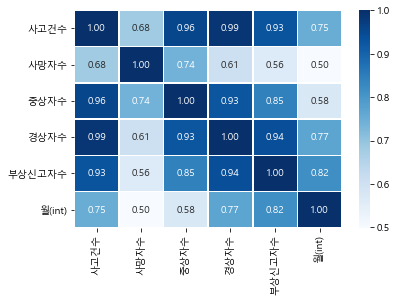

In [357]:
sns.heatmap(ta_month_new.corr(),
            annot=True,
            fmt = '.2f',
            linewidths=.5,
            cmap='Blues')

# 4. 교통사고 지도 만들기

In [327]:
# 지도 시각화를 위한 모듈 import
import folium